# Seek Market Analysis
#### Collaborators:
James Rutherford - s5132147 - james.rutherford@griffithuni.edu.au  
Zakaria Wardere - s5302830 - zakaria.wardere@griffithuni.edu.au

## Part 2: Data Analysis and Interpretation

Import necessary packages

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px

Read in the cleaned data set

In [150]:
df = pd.read_csv('data_cleaned.csv')

C:\Users\jruth\AppData\Local\Temp\ipykernel_3616\2599512217.py:1: DtypeWarning: Columns (3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_cleaned.csv')


Create a colour palette for consistency in visualisations

In [151]:
# classifications = df['Classification'].unique()
# palette = sns.color_palette("Spectral", len(classifications))
# color_mapping = dict(zip(classifications, palette))
# with open('classification_color_palette.pkl', 'wb') as f:
#     pickle.dump(color_mapping, f)
# # Load the color palette
# with open('classification_color_palette.pkl', 'rb') as f:
#     color_mapping = pickle.load(f)

# # Create a bar plot using the stored color palette
# plt.figure(figsize=(14, 7))
# sns.countplot(y='Classification', data=df,
#               order=df['Classification'].value_counts().index,
#               palette=[color_mapping[x] for x in df['Classification'].value_counts().index])
# plt.title('Number of Jobs by Classification')
# plt.xlabel('Number of Jobs')
# plt.ylabel('Classification')
# plt.tight_layout()
# plt.show()

## Job Meta Data
Talk about this
1) Study Job metadata
- What is the sector / subsector of each job
- Where is the location of the job?
- Which is the range of salaries for each job?

### Classifications

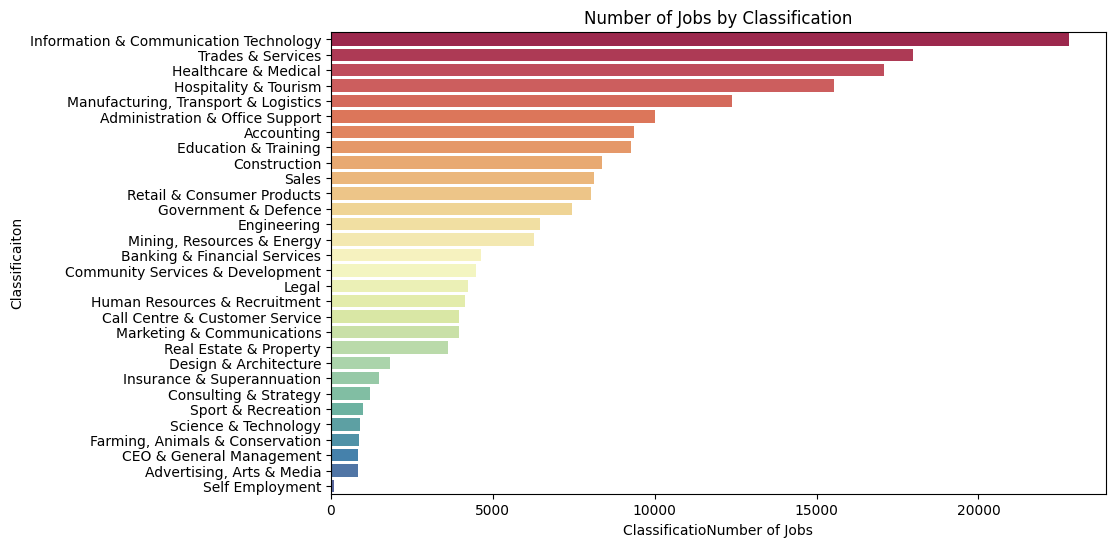

In [152]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Classification'].value_counts(), y=df['Classification'].value_counts().index, hue=df['Classification'].value_counts().index, palette='Spectral')
plt.title('Number of Jobs by Classification')
plt.xlabel('ClassificatioNumber of Jobs')
plt.ylabel('Classificaiton')
plt.show()

#### Obvserations:
- asd
- asd

### Location

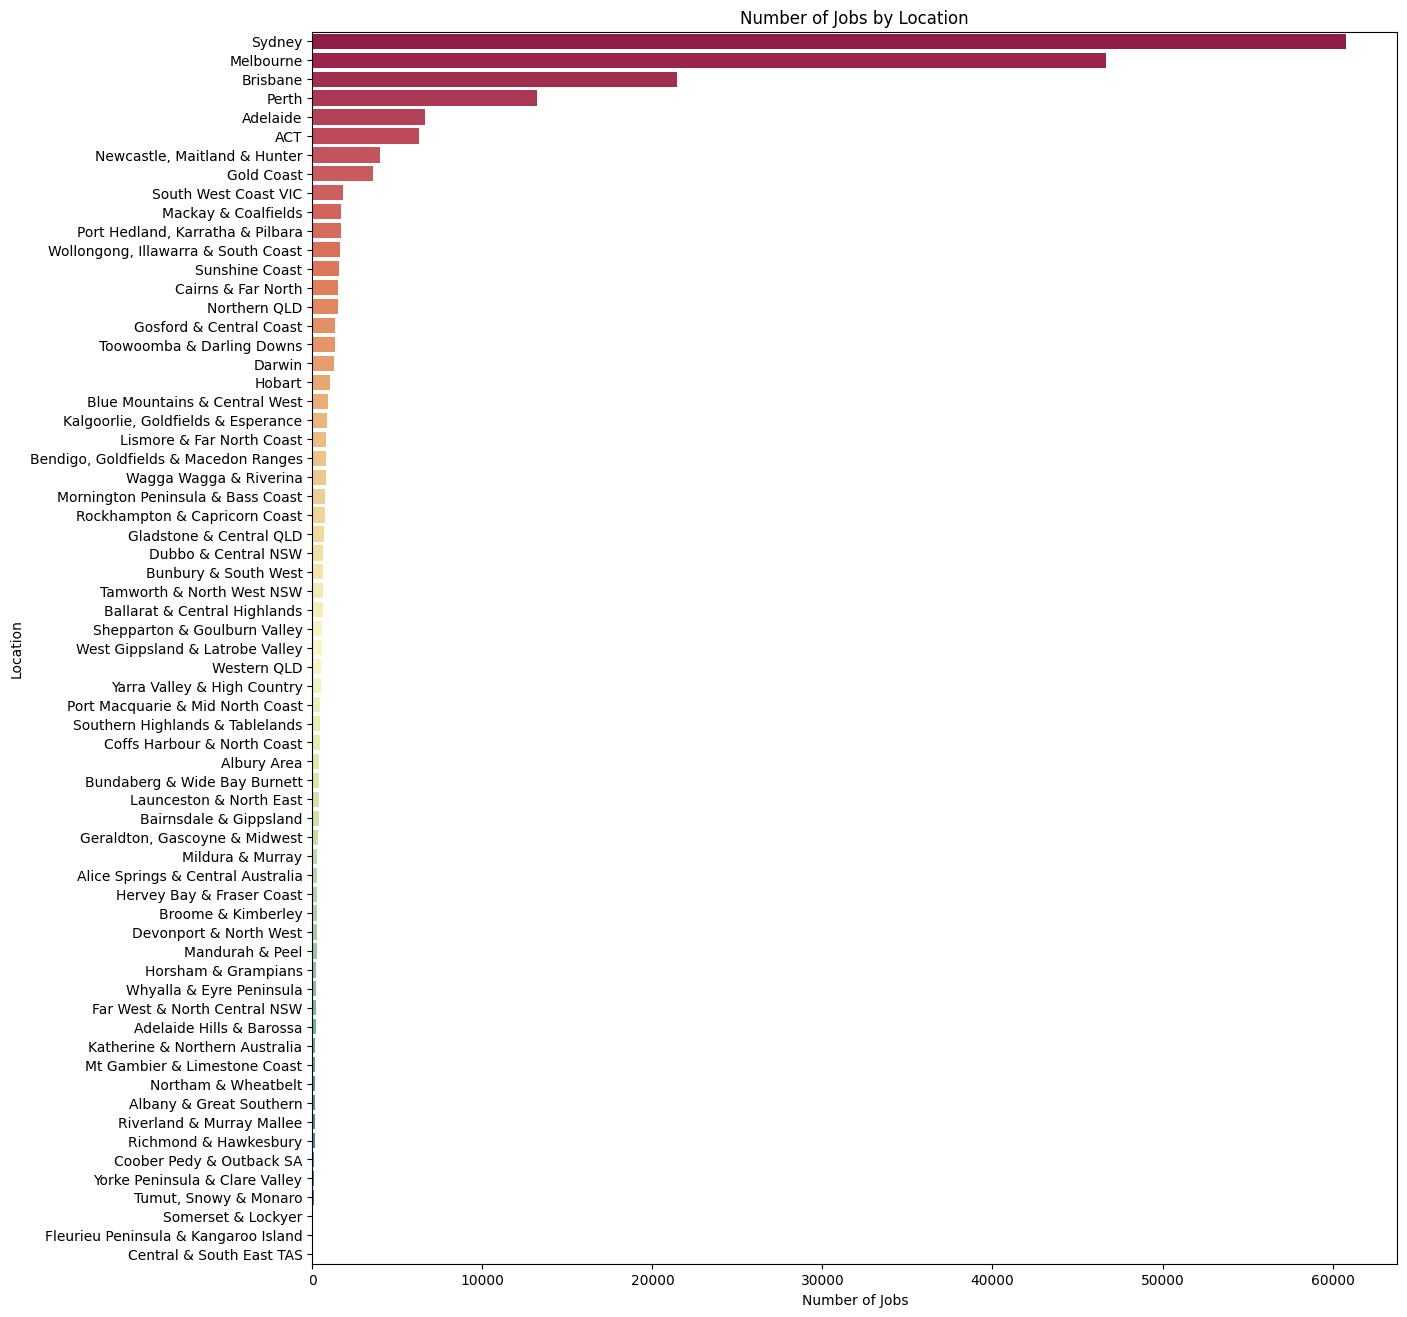

In [153]:
# Plot number of jobs by Location
plt.figure(figsize=(14, 16))
sns.barplot(x=df['Location'].value_counts(), y=df['Location'].value_counts().index, hue=df['Location'].value_counts().index, palette='Spectral')
plt.title('Number of Jobs by Location')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.show()

# Store the colours of the classification for use in other plots
classification_colours = sns.color_palette('Spectral', len(df['Classification'].unique()))

#### Observations:
- A lot in Sydney
- And other major hubs

### Salary Ranges & Job Types

In [154]:
# Melt the DataFrame to have a single salary column for plotting
melted_df = df.melt(id_vars=['Classification'], value_vars=['HighestSalary', 'LowestSalary'], var_name='SalaryType', value_name='Salary')

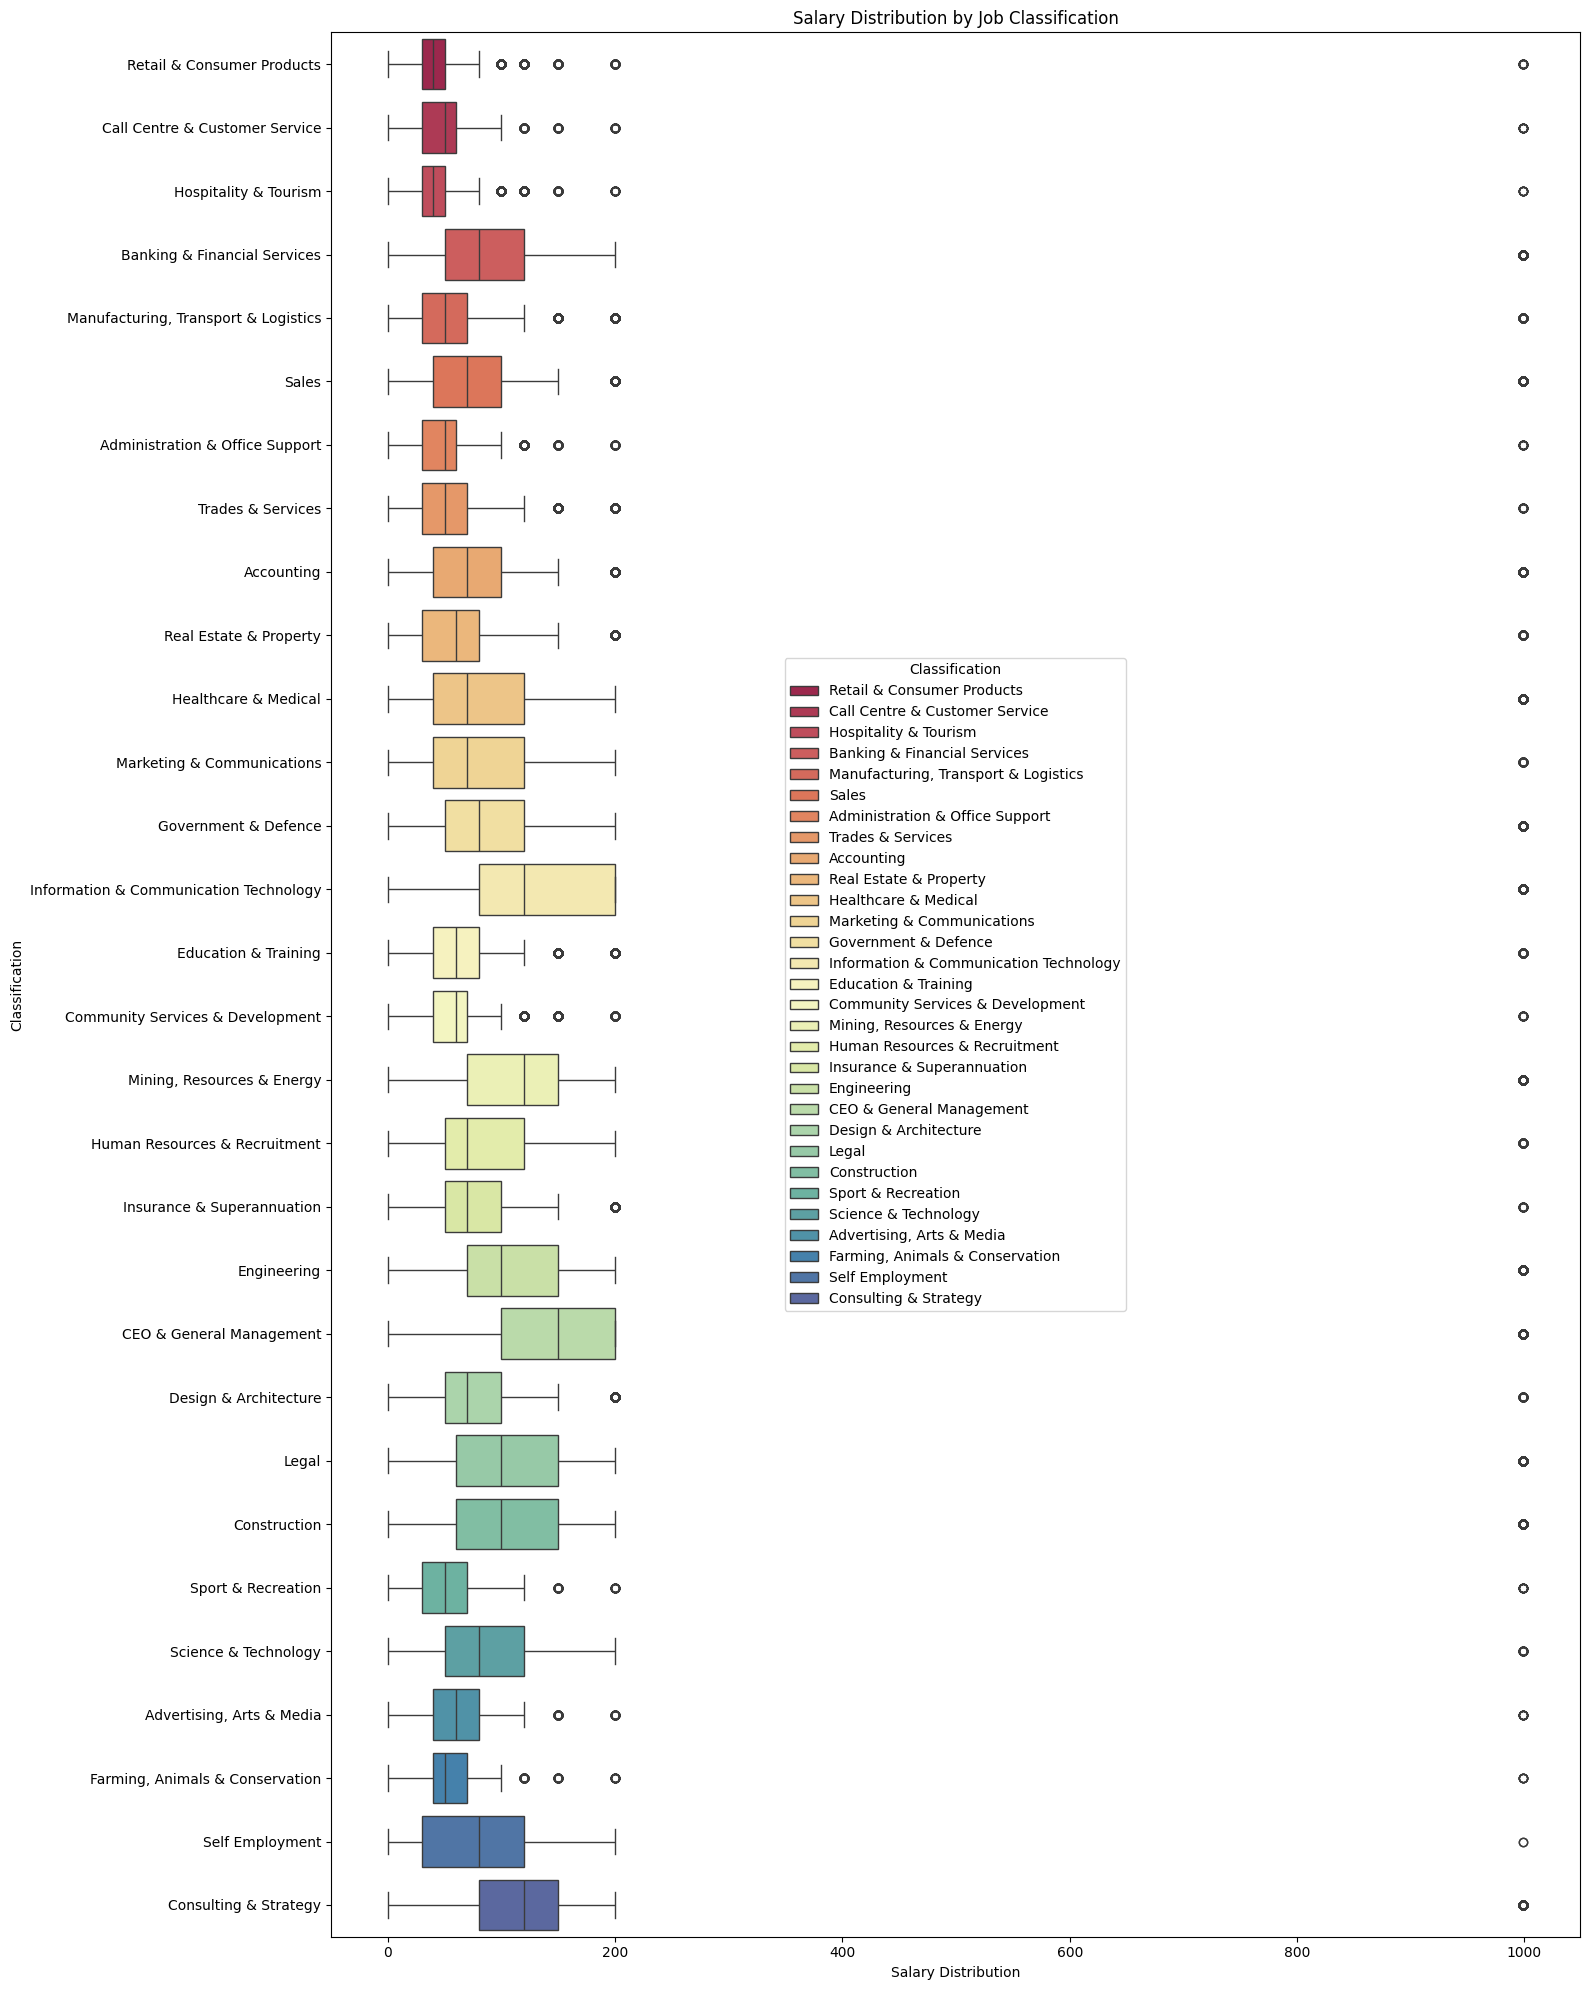

In [155]:
plt.figure(figsize=(16, 20))
sns.boxplot(x='Salary', y='Classification', data=melted_df, hue='Classification', palette='Spectral')
plt.title('Salary Distribution by Job Classification')
plt.xlabel('Salary Distribution')
plt.ylabel('Classification')
plt.tight_layout()
plt.show()

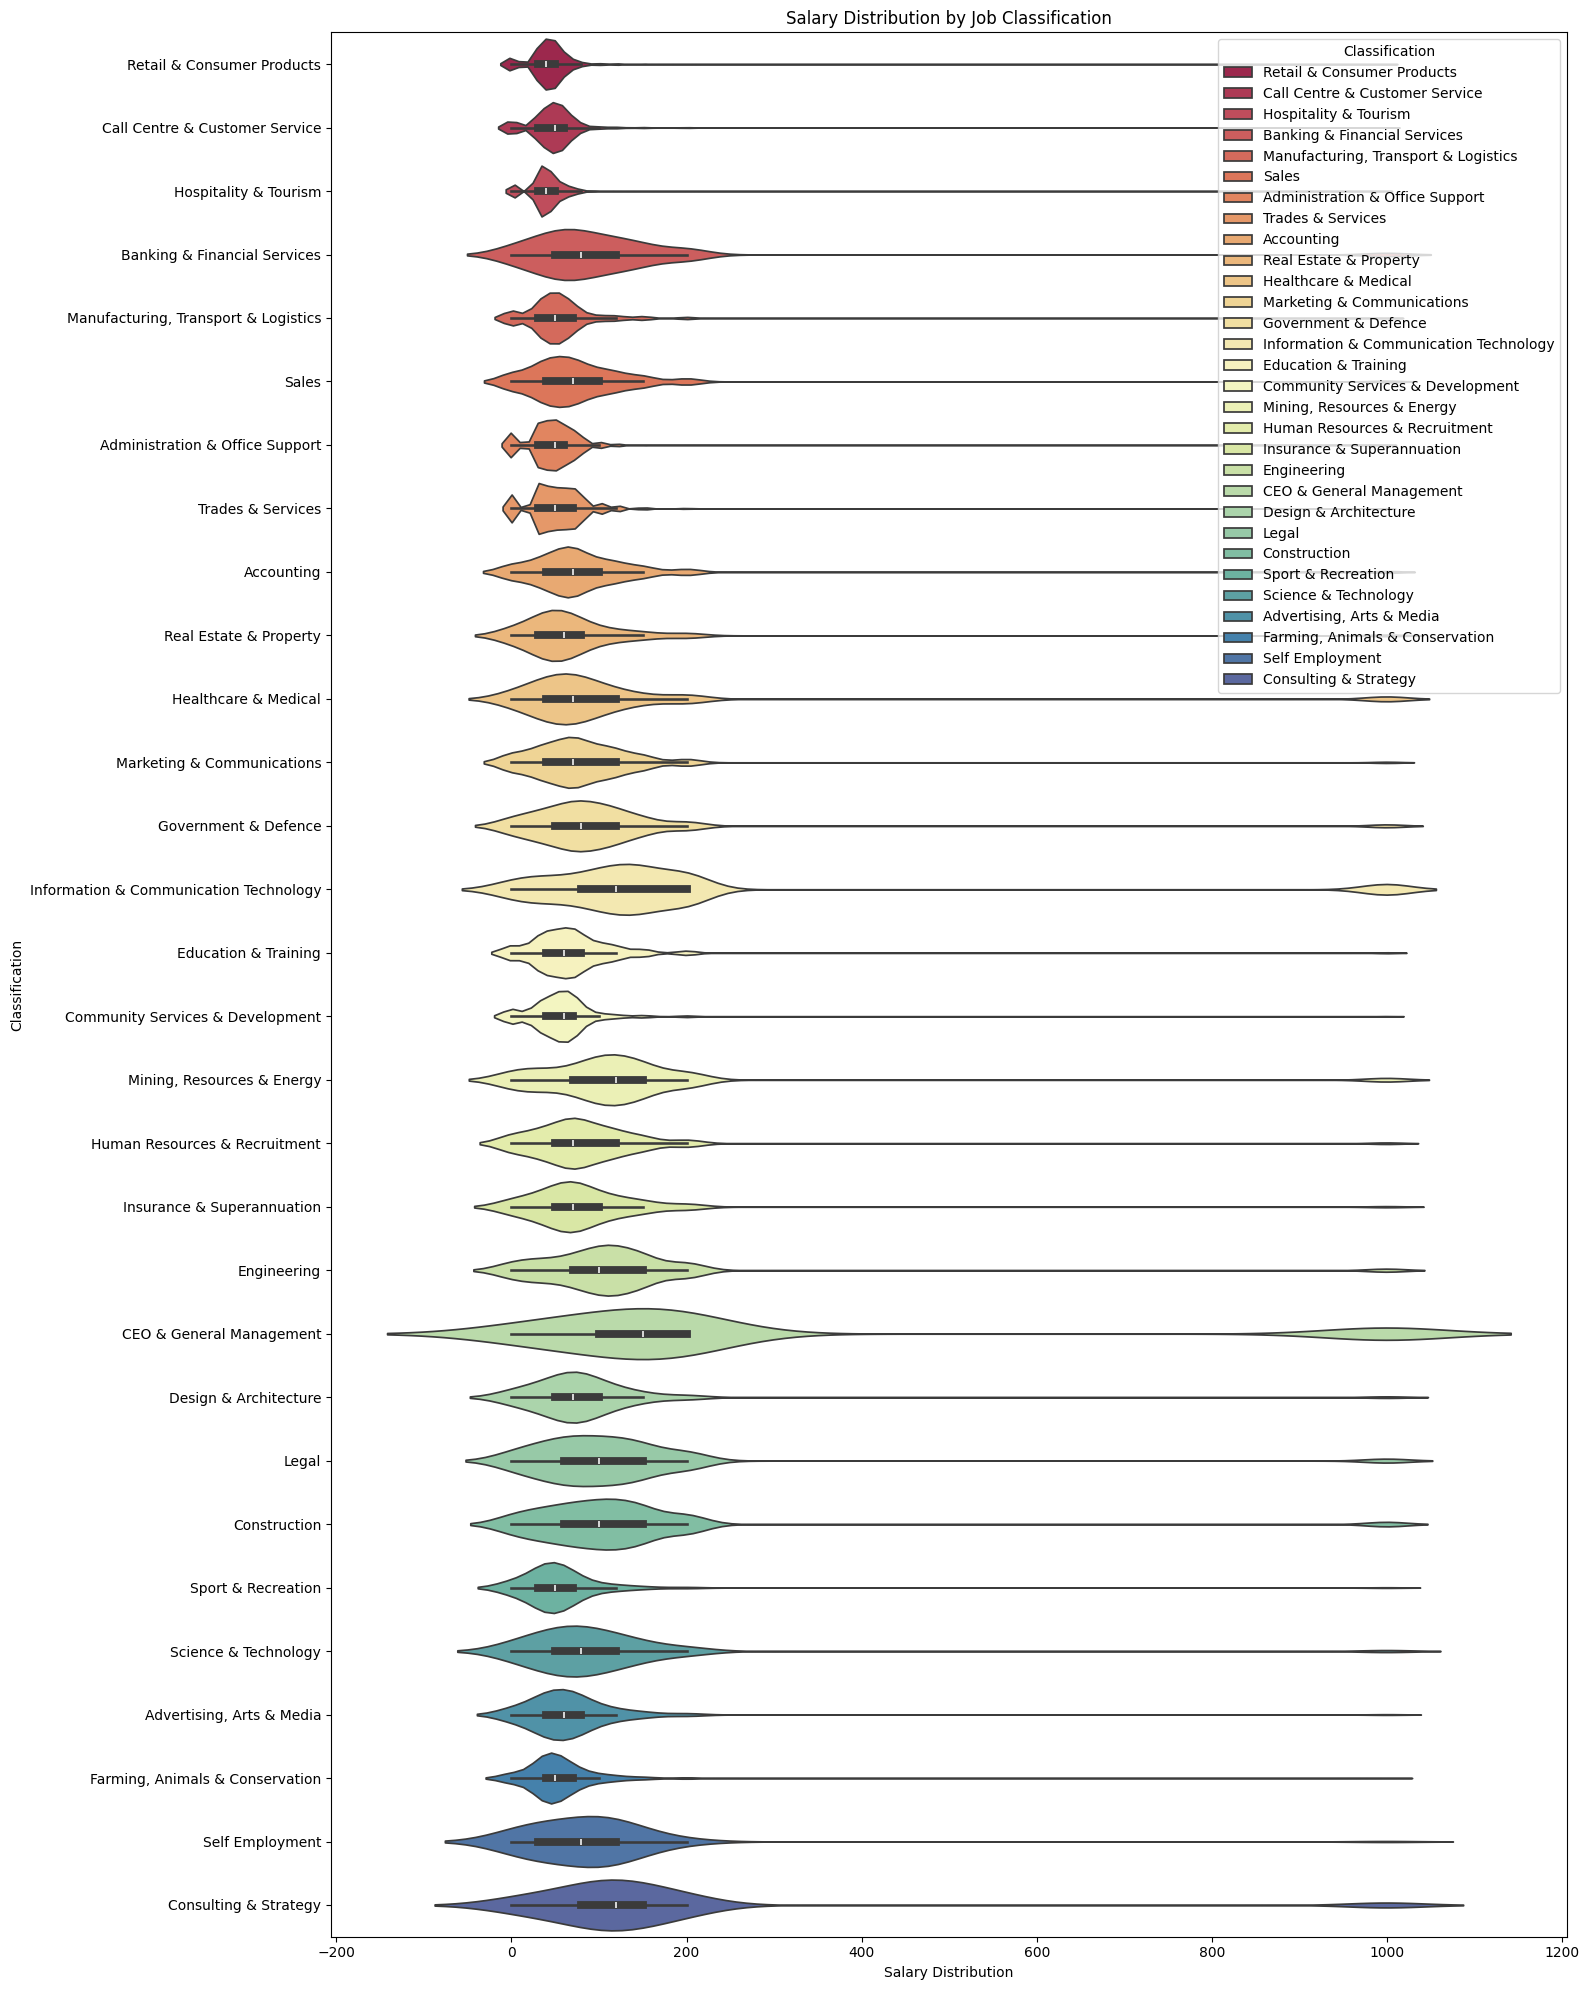

In [156]:
plt.figure(figsize=(16, 20))
sns.violinplot(x='Salary', y='Classification', data=melted_df, hue='Classification', palette='Spectral')
plt.title('Salary Distribution by Job Classification')
plt.xlabel('Salary Distribution')
plt.ylabel('Classification')
plt.tight_layout()
plt.show()

#### Observations:

### Job Market by Location
2) Study the market by locations.
- What is the market size in each city? Which are the hottest job
sectors in each city?
- Which range of salary is common in each city? Where are the
employees more well-paid?
- Can you detect the pattern of posting: e.g., are more jobs posted at the beginning of the month?

### Market size in each city

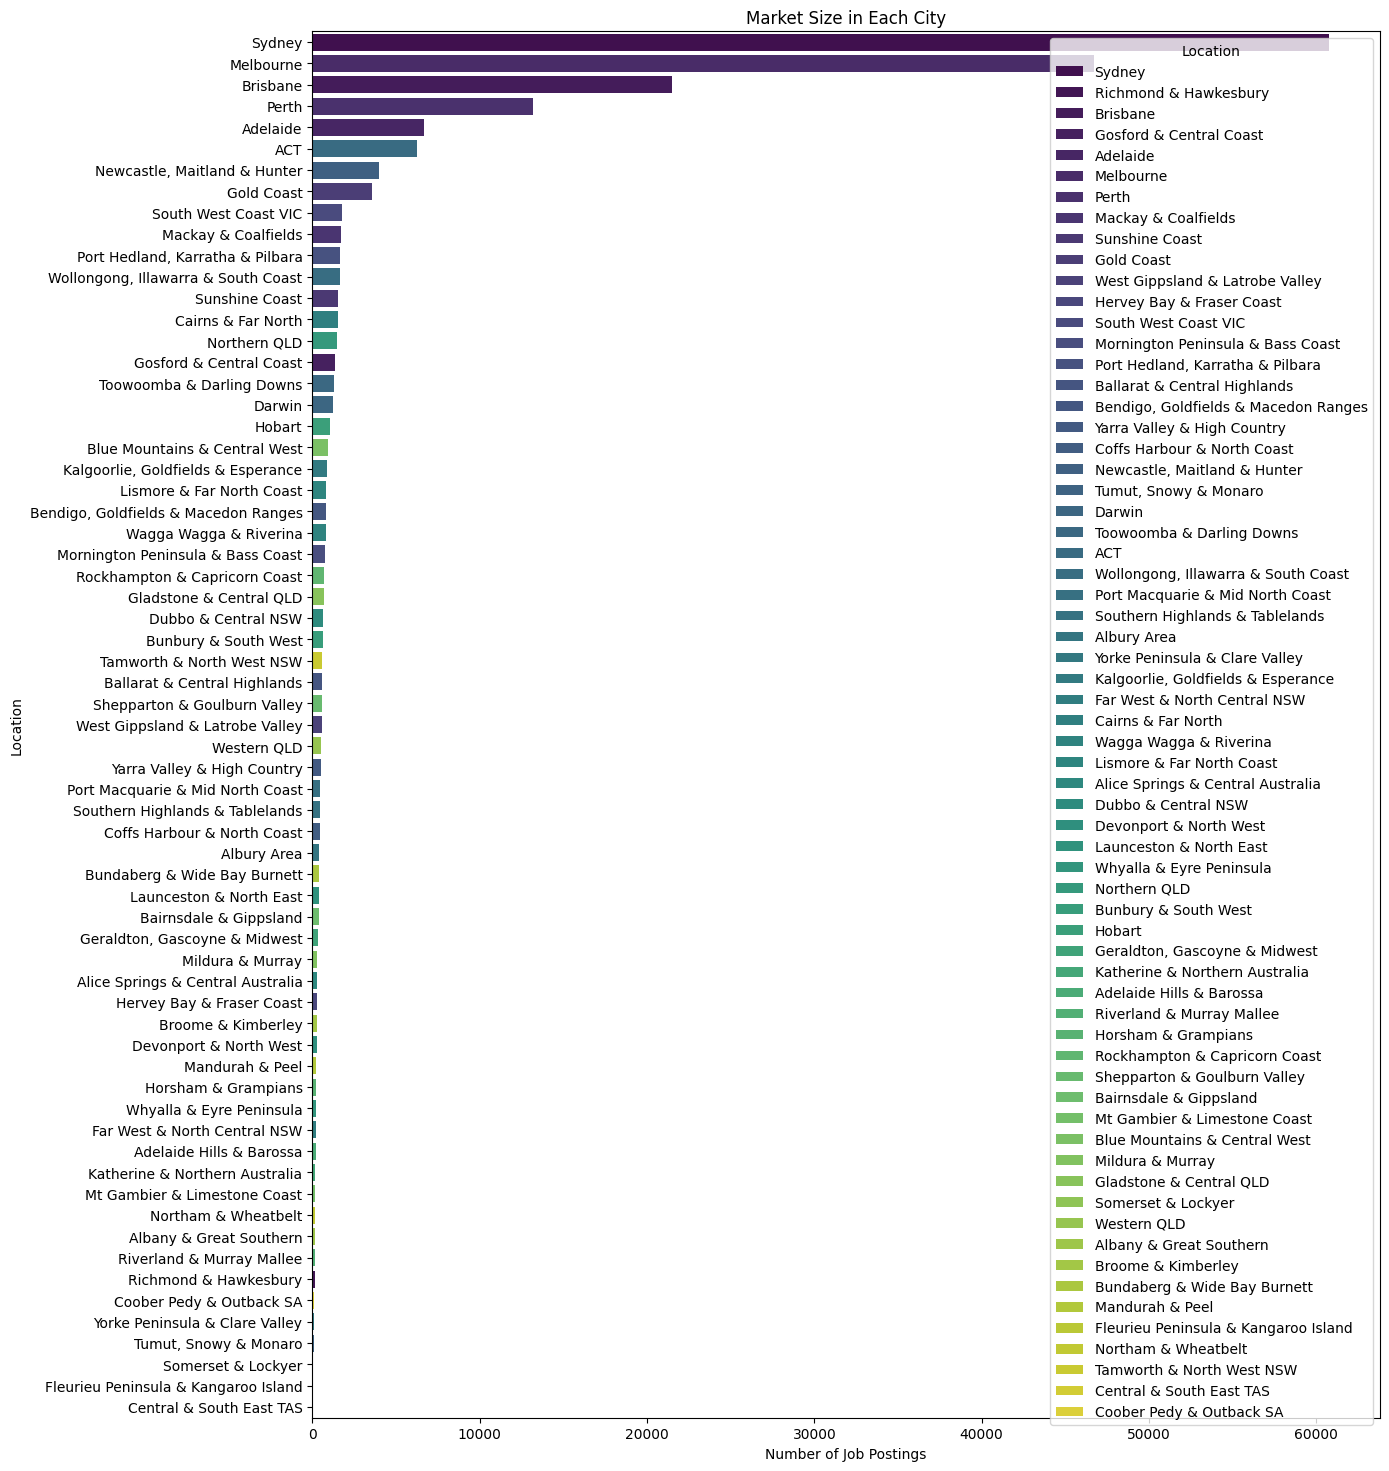

In [157]:
# Market size in each city
plt.figure(figsize=(14, 16))
sns.countplot(y='Location', data=df, order=df['Location'].value_counts().index, hue='Location', palette='viridis')
plt.title('Market Size in Each City')
plt.xlabel('Number of Job Postings')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

### Hottest Job Sectors in Each City

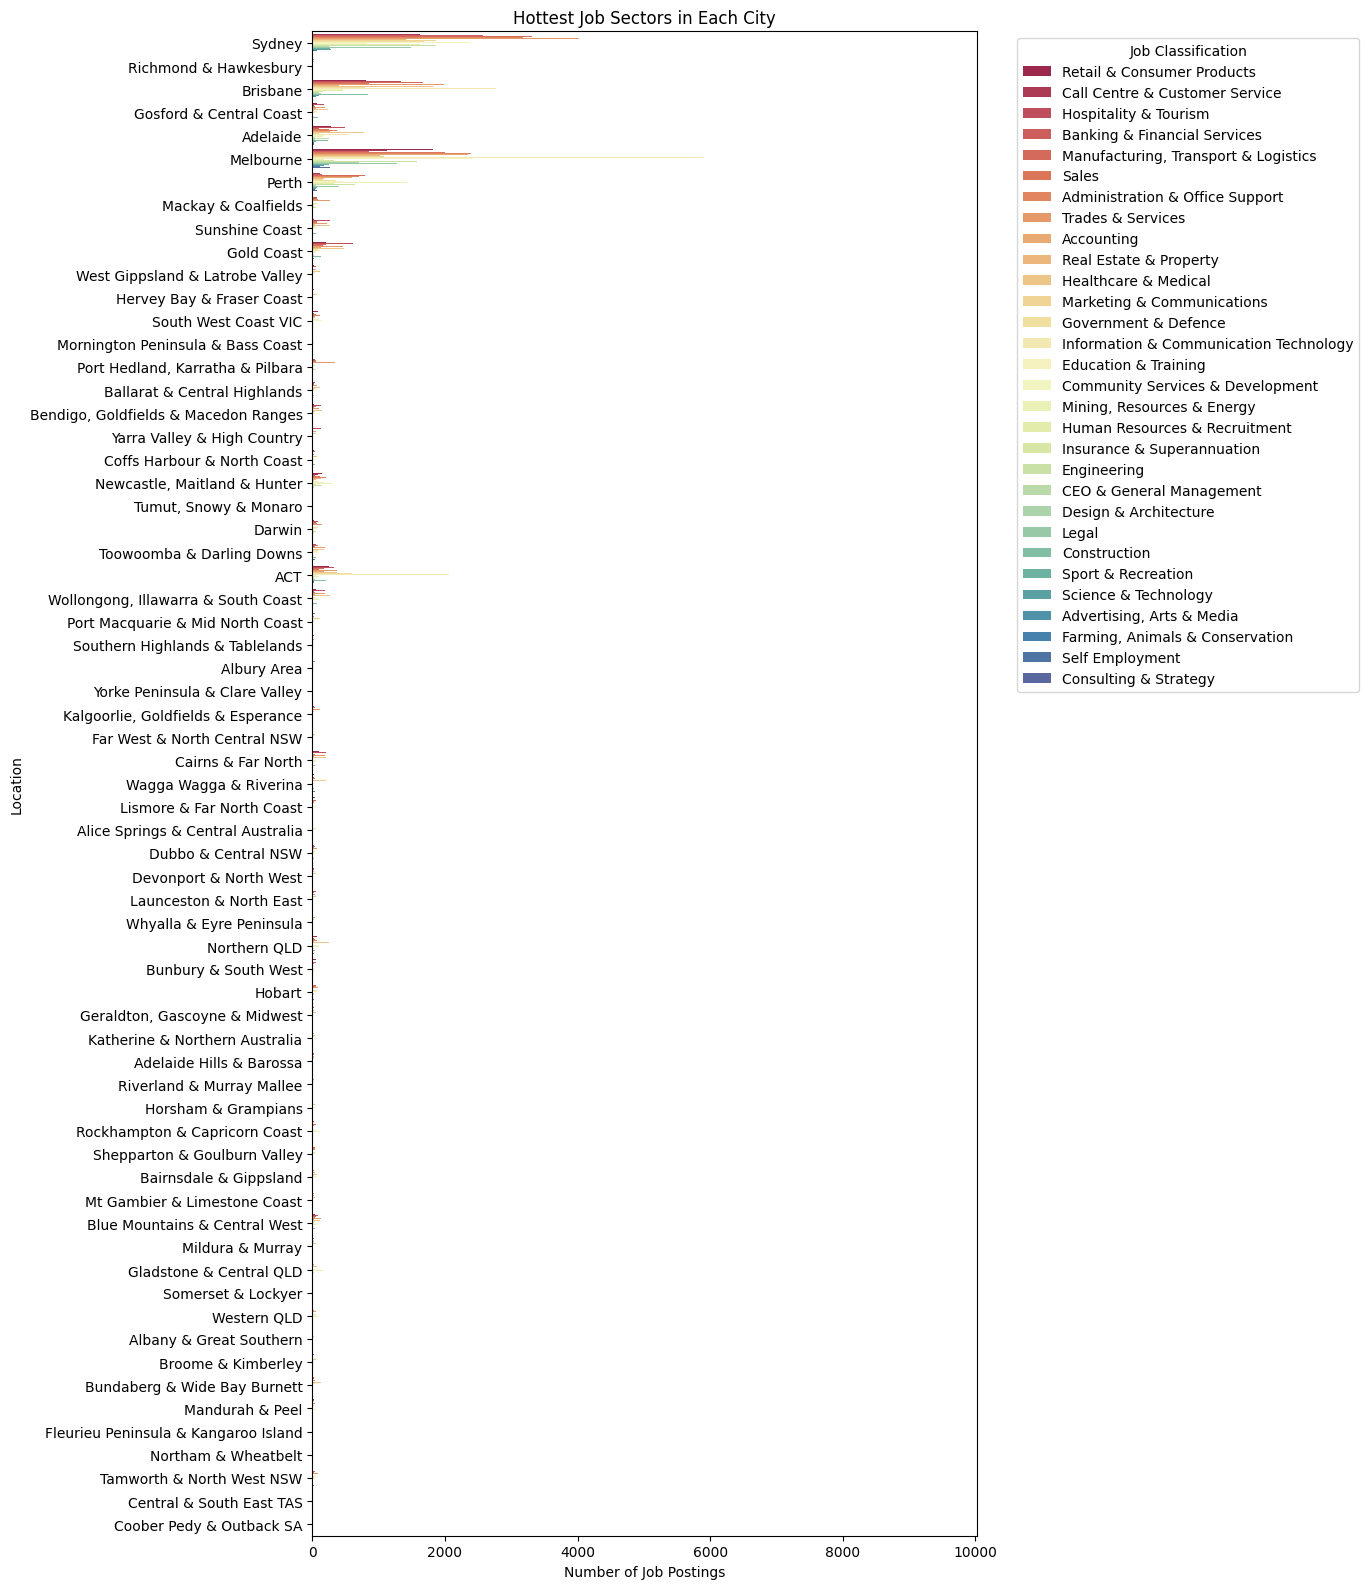

In [158]:
# Hottest job sectors in each city
plt.figure(figsize=(14, 16))
sns.countplot(y='Location', hue='Classification', data=df, palette='Spectral')
plt.title('Hottest Job Sectors in Each City')
plt.xlabel('Number of Job Postings')
plt.ylabel('Location')
plt.legend(title='Job Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

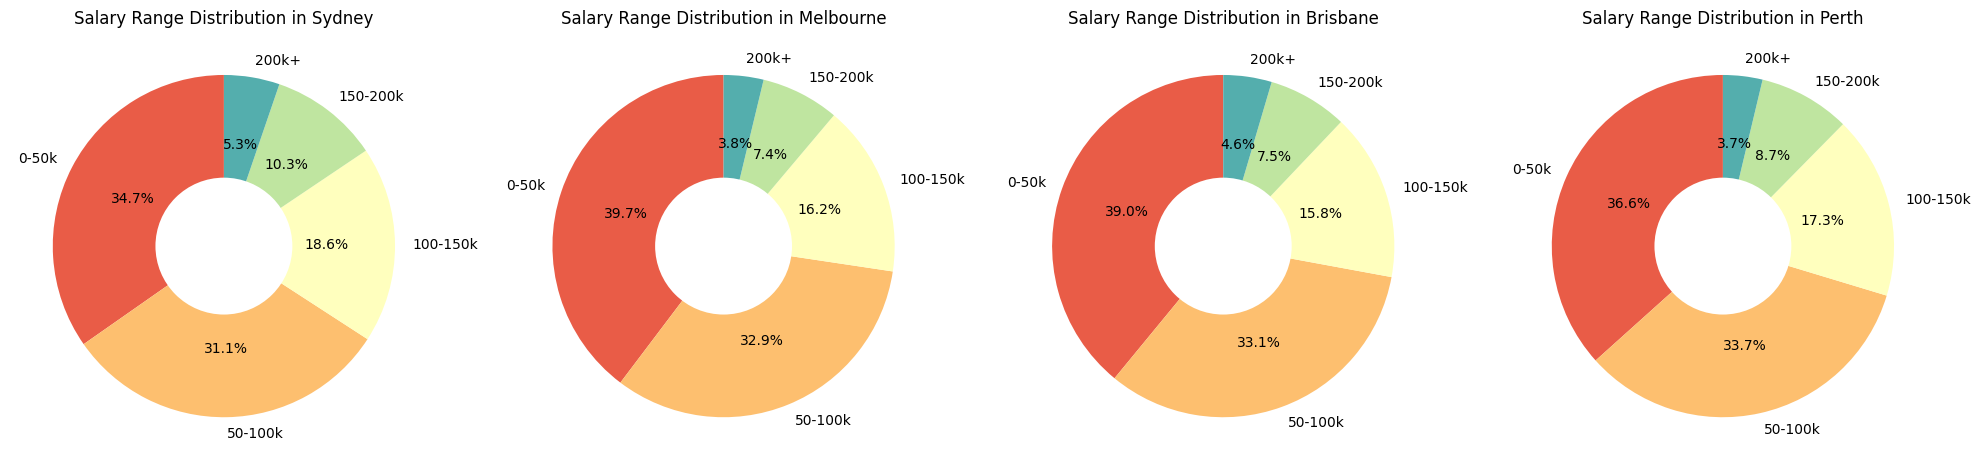

In [159]:
salary_bins = [0, 50, 100, 150, 200, np.inf]
salary_labels = ['0-50k', '50-100k', '100-150k', '150-200k', '200k+']

df['AverageSalary'] = (df['HighestSalary'] + df['LowestSalary']) / 2
df['SalaryRange'] = pd.cut(df['AverageSalary'], bins=salary_bins, labels=salary_labels)

# Filter for specific cities
cities = ['Sydney', 'Melbourne', 'Brisbane', 'Perth']
df_filtered = df[df['Location'].isin(cities)]
salary_distribution = df_filtered.groupby(['Location', 'SalaryRange'], observed=False).size().unstack()
num_cities = len(cities)

fig, axes = plt.subplots(nrows=1, ncols=num_cities, figsize=(20, 10))
for i, city in enumerate(cities):
    ax = axes[i] if num_cities > 1 else axes
    wedges, texts, autotexts = ax.pie(
        salary_distribution.loc[city],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('Spectral', len(salary_labels)),
        wedgeprops=dict(width=0.8),
        labels=salary_labels
    )
    ax.set_ylabel('')
    ax.set_title(f'Salary Range Distribution in {city}')
    centre_circle = plt.Circle((0, 0), 0.4, fc='white')
    ax.add_artist(centre_circle)
    
plt.tight_layout()
plt.show()

### Time Series Analysis

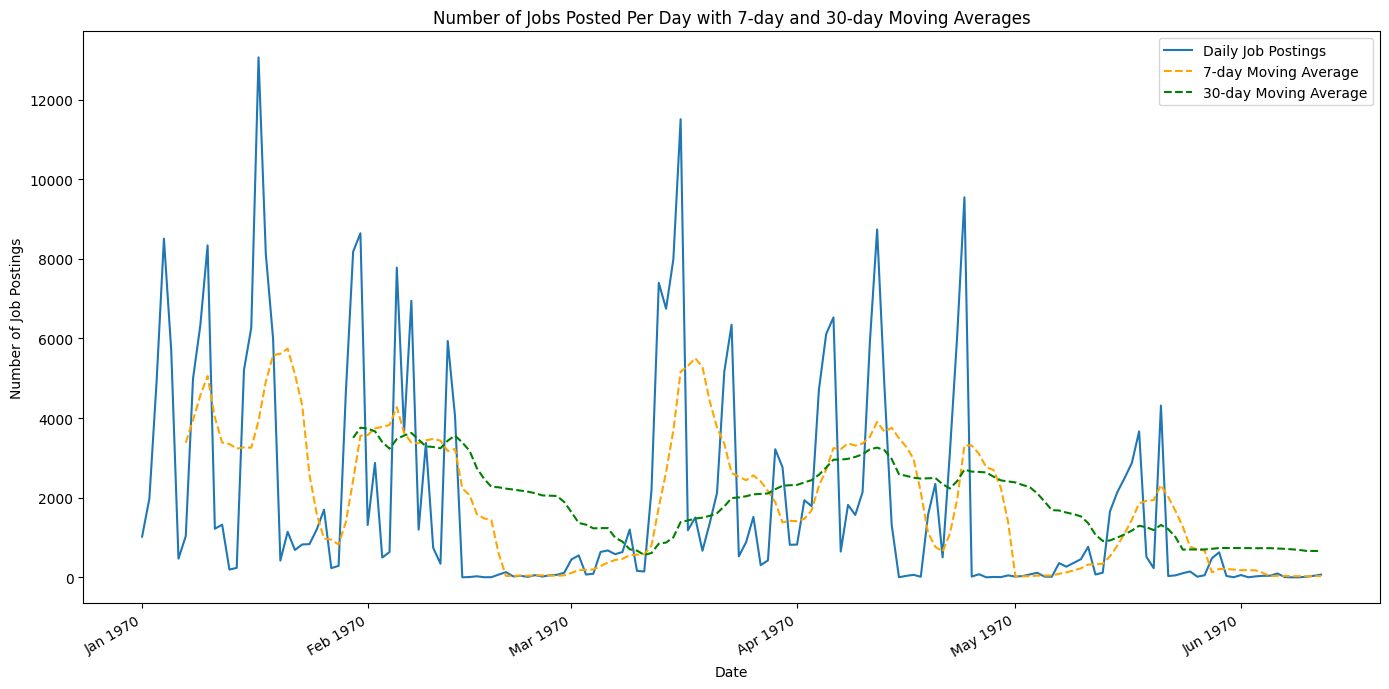

In [160]:
daily_postings = df.groupby('Date').size().reset_index(name='Job Postings')

# Calculate the 7-day and 30-day moving averages
daily_postings['7-day Moving Average'] = daily_postings['Job Postings'].rolling(window=7).mean()
daily_postings['30-day Moving Average'] = daily_postings['Job Postings'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_postings, x='Date', y='Job Postings', label='Daily Job Postings')
sns.lineplot(data=daily_postings, x='Date', y='7-day Moving Average', label='7-day Moving Average', color='orange', linestyle='--')
sns.lineplot(data=daily_postings, x='Date', y='30-day Moving Average', label='30-day Moving Average', color='green', linestyle='--')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()

plt.title('Number of Jobs Posted Per Day with 7-day and 30-day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.legend()
plt.tight_layout()
plt.show()

Observations:
worth considering that a significant amount of data was removed.
etc
etc

### Job Market by Sectors
3) Study the market by sectors.
- Which sectors keep the highest market share?
- In each sector, which sub-sectors are the main spotlights?
- What is the salary range for each sector/sub-sector? Can you
compare the salary range between sectors/subsectors?
- What is the trending of the market, i.e., if a high school student
asks you which subject should he/she learn in the university (to
guarantee a job in the future), what is your advice?
- Can you detect which skills are required in each sector?


In [170]:
classification_counts = df['Classification'].value_counts().reset_index()
classification_counts.columns = ['Classification', 'Job Postings']

fig = px.bar(classification_counts, x='Job Postings', y='Classification', orientation='h', color='Job Postings', color_continuous_scale='Spectral', title='Market Share by Classification')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

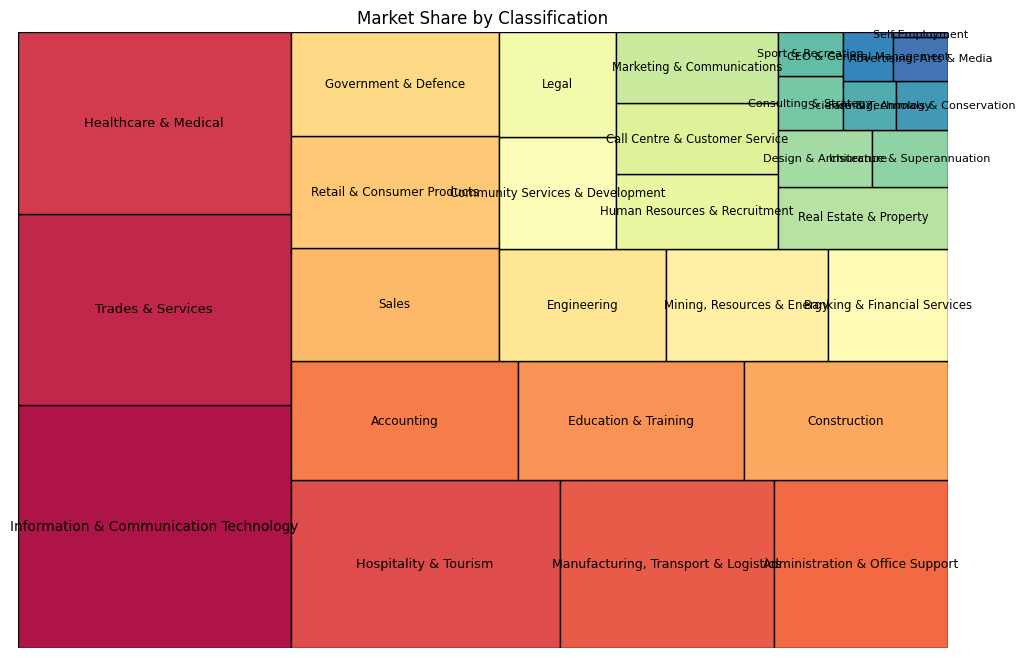

In [174]:
import squarify

# Calculate the count of job postings for each classification
classification_counts = df['Classification'].value_counts().reset_index()
classification_counts.columns = ['Classification', 'Job Postings']

# Plot the market share using a treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=classification_counts['Job Postings'], label=classification_counts['Classification'], alpha=.8, color=sns.color_palette('Spectral', len(classification_counts)))
plt.title('Market Share by Classification')
plt.axis('off')
plt.show()


### SubClassifications in each Classification

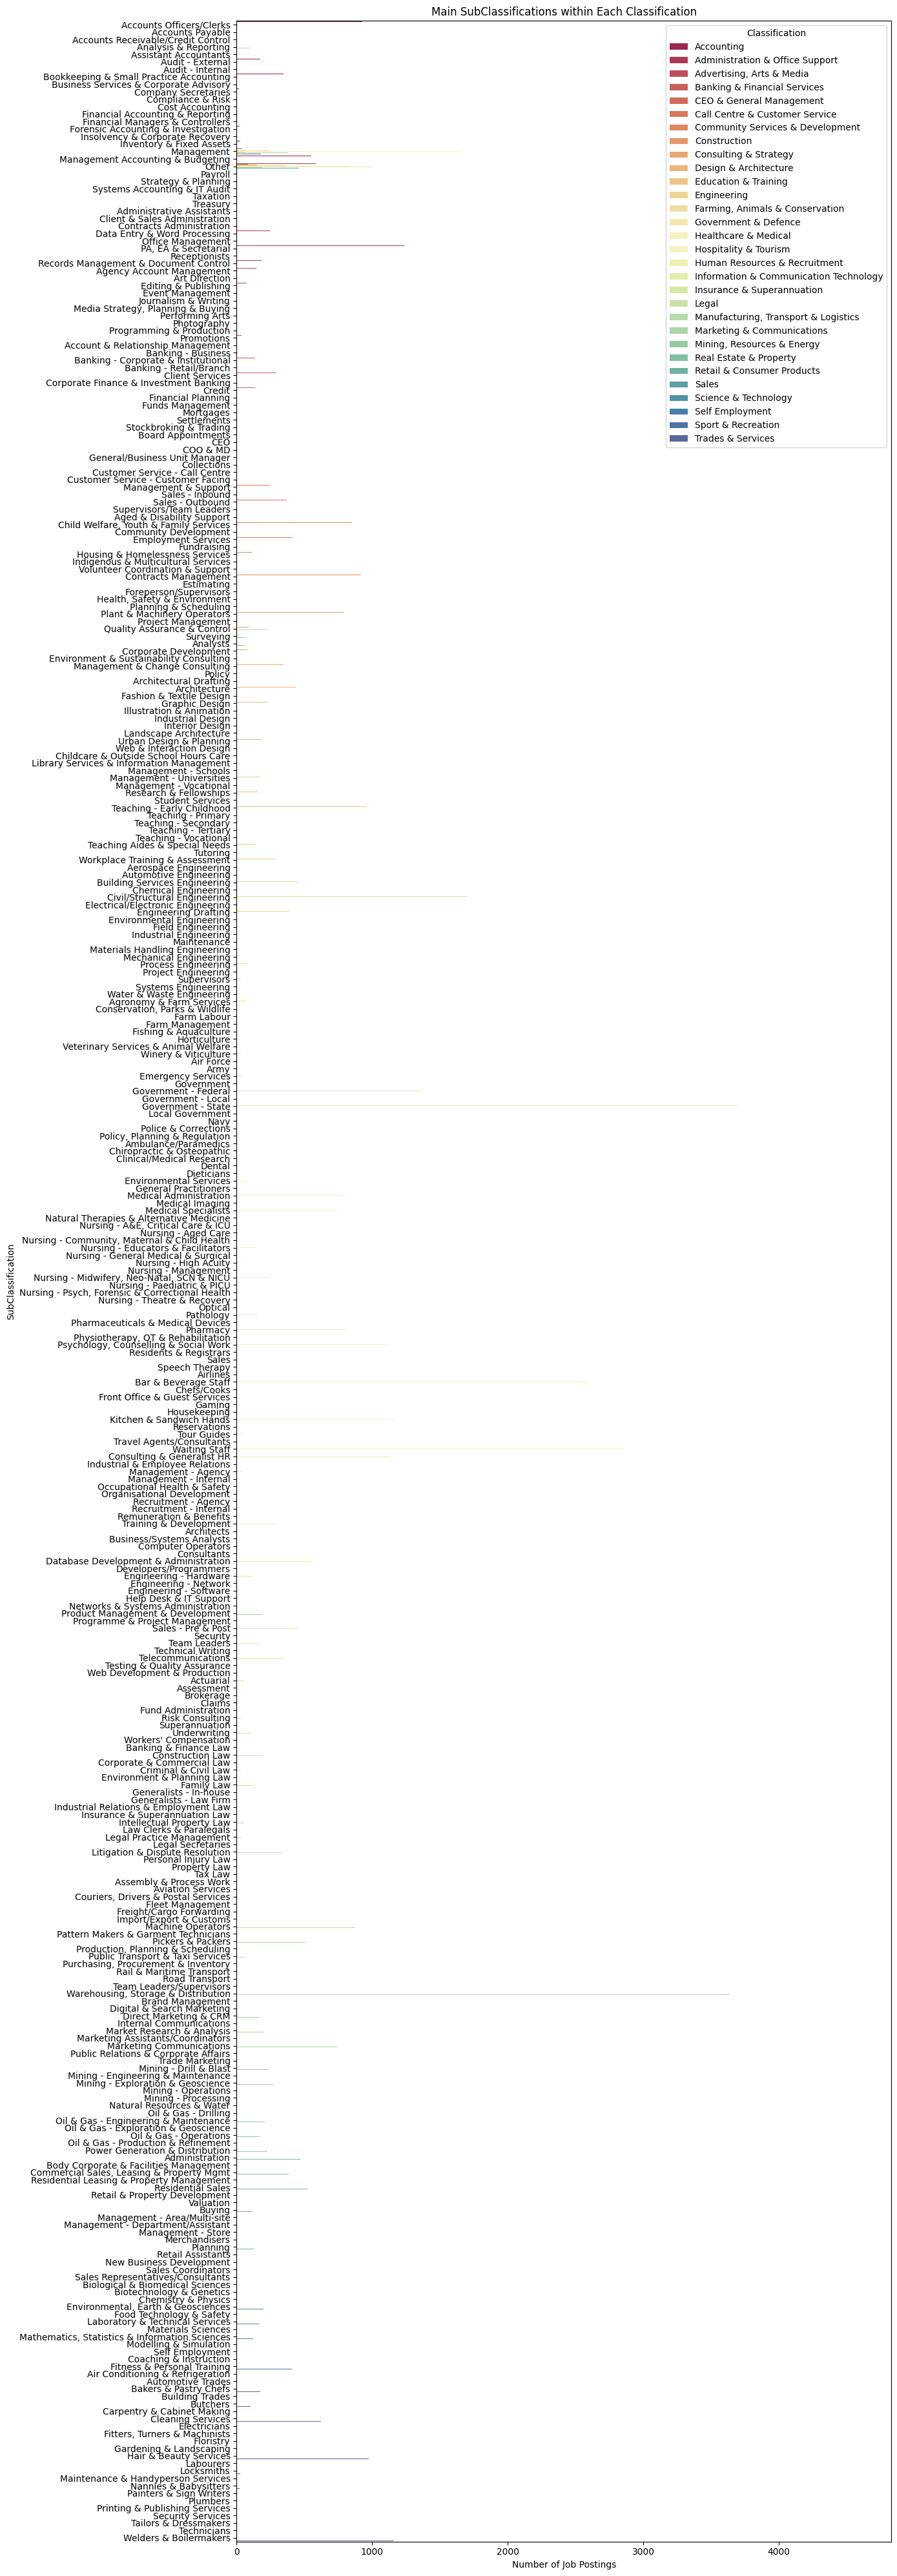

In [163]:
# Group by Classification and SubClassification and count the job postings
subclassification_counts = df.groupby(['Classification', 'SubClassification']).size().reset_index(name='Job Postings')

# Plot the main sub-classifications within each classification
plt.figure(figsize=(14, 40))
sns.barplot(x='Job Postings', y='SubClassification', hue='Classification', data=subclassification_counts, palette='Spectral')
plt.title('Main SubClassifications within Each Classification')
plt.xlabel('Number of Job Postings')
plt.ylabel('SubClassification')
plt.tight_layout()
plt.show()